In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option("display.max_columns", None)

In [41]:
fire_robust = pd.read_csv('./fire_robust_1to1.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)
fire_minmax = pd.read_csv('./fire_minmax_1to1.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)
fire_standard = pd.read_csv('./fire_standard_1to1.csv', encoding = 'cp949').drop('Unnamed: 0', axis  = 1)

In [42]:
fire_robust

,fr_yn,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
0,0,0.0,-0.419604,-0.269063,0.154155,-0.5,0.0,0.092490,0.055556,-1.132487,0.138745,0.184211,0.313944,0.0,0.0,0.145234,-0.447236,-0.186408,1.200783,0.00
1,0,1.0,0.253727,-0.060409,-0.051385,-0.5,0.0,0.601895,-0.088283,0.929427,-0.072948,0.605263,-0.049402,0.0,0.0,-0.119884,-0.496768,1.001858,-0.226461,0.50
2,0,-0.5,-0.377678,-0.253742,0.183518,-0.5,0.0,-0.251809,0.586074,0.236813,-0.105131,-0.763158,-0.055777,1.0,0.0,1.400581,0.827166,0.605586,-0.201027,0.00
3,0,-0.5,-0.907523,-0.447367,-0.220221,-0.5,0.0,-0.202069,0.272869,0.356270,0.659396,-0.355263,0.111554,0.0,0.0,0.902561,-0.148257,-0.267127,-0.082661,0.25
4,0,0.5,-0.298852,-0.224936,-0.381717,-0.5,0.0,-0.325735,1.144084,-0.899348,1.736456,-0.723684,0.127490,0.0,0.0,2.016636,1.473168,-0.428235,0.016141,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6023,1,-0.5,5.561890,15.004196,1.681267,4.0,1.0,1.832000,-0.014482,0.751524,-0.156624,0.486842,-0.286853,1.0,2.0,-0.298917,-0.525380,0.759646,-0.192223,0.00
6024,1,0.0,-0.266636,-0.213163,-0.461730,-0.5,0.0,-0.009063,0.256832,-0.668505,-0.028607,0.486842,-0.170518,0.0,1.0,0.394508,-0.459759,0.858480,0.234287,0.75
6025,1,-0.5,-0.534872,-0.311186,-0.599491,-0.5,0.0,-0.180503,-0.349779,-0.456021,0.242446,0.486842,0.690040,0.0,0.0,-0.068656,-0.358765,0.352747,1.116654,0.00
6026,1,-0.5,-0.683955,-0.365667,-0.668004,-0.5,0.0,1.888073,-0.397398,-0.332679,-0.049347,0.184211,-0.030279,0.0,0.0,-0.278585,-0.514589,-0.165485,0.021032,2.00


## 1. Logistic regression

### 1-1. Robust

In [43]:
res = smf.ols(formula = 'fr_yn ~ ttl_grnd_flr + ttl_dwn_flr + bldng_ar_prc + fr_wthr_fclt_dstnc + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_robust).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:38:39   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5187 

In [44]:
fire_robust_selected = fire_robust.iloc[:, [0, 5, 6, 9, 10, 14, 16, 17]]
fire_robust_selected

,fr_yn,ttl_grnd_flr,ttl_dwn_flr,bldng_ar_prc,fr_wthr_fclt_dstnc,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,0,-0.5,0.0,-1.132487,0.138745,0.0,-0.447236,-0.186408
1,0,-0.5,0.0,0.929427,-0.072948,0.0,-0.496768,1.001858
2,0,-0.5,0.0,0.236813,-0.105131,0.0,0.827166,0.605586
3,0,-0.5,0.0,0.356270,0.659396,0.0,-0.148257,-0.267127
4,0,-0.5,0.0,-0.899348,1.736456,0.0,1.473168,-0.428235
...,...,...,...,...,...,...,...,...
6023,1,4.0,1.0,0.751524,-0.156624,2.0,-0.525380,0.759646
6024,1,-0.5,0.0,-0.668505,-0.028607,1.0,-0.459759,0.858480
6025,1,-0.5,0.0,-0.456021,0.242446,0.0,-0.358765,0.352747
6026,1,-0.5,0.0,-0.332679,-0.049347,0.0,-0.514589,-0.165485


In [45]:
fire_robust_features = fire_robust_selected.iloc[:, 1:]
fire_robust_labels = fire_robust_selected.iloc[:, 0]

In [46]:
train_x, test_x, train_y, test_y = train_test_split(fire_robust_features, fire_robust_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_robust_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:39:10   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5187 

Text(0.5, 15.0, 'Predicted label')

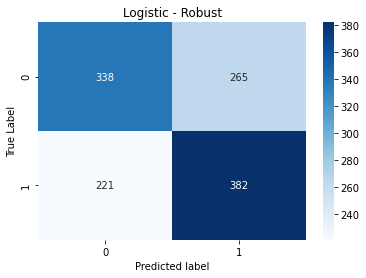

In [47]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_robust_features)
model = sm.OLS(fire_robust_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

plt.title('Logistic - Robust')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 1-2. MinMax

In [48]:
res = smf.ols(formula = 'fr_yn ~ ttl_grnd_flr + ttl_dwn_flr + bldng_ar_prc + fr_wthr_fclt_dstnc + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_minmax).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:39:24   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4412 

In [49]:
fire_minmax_selected = fire_minmax.iloc[:, [0, 5, 6, 9, 10, 14, 16, 17]]
fire_minmax_selected

,fr_yn,ttl_grnd_flr,ttl_dwn_flr,bldng_ar_prc,fr_wthr_fclt_dstnc,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,0,0.000000,0.00,0.000717,0.031710,0.000000,0.033806,0.083997
1,0,0.000000,0.00,0.188550,0.009147,0.000000,0.013987,0.471998
2,0,0.000000,0.00,0.125456,0.005717,0.000000,0.543711,0.342604
3,0,0.000000,0.00,0.136338,0.087202,0.000000,0.153431,0.057640
4,0,0.000000,0.00,0.021955,0.201997,0.000000,0.802184,0.005034
...,...,...,...,...,...,...,...,...
6023,1,0.021845,0.05,0.172344,0.000229,0.083333,0.002540,0.392909
6024,1,0.000000,0.00,0.042984,0.013873,0.041667,0.028795,0.425181
6025,1,0.000000,0.00,0.062341,0.042762,0.000000,0.069204,0.260046
6026,1,0.000000,0.00,0.073577,0.011662,0.000000,0.006857,0.090829


In [50]:
fire_minmax_features = fire_minmax_selected.iloc[:, 1:]
fire_minmax_labels = fire_minmax_selected.iloc[:, 0]

In [51]:
train_x, test_x, train_y, test_y = train_test_split(fire_minmax_features, fire_minmax_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_minmax_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:39:25   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4412 

Text(0.5, 15.0, 'Predicted label')

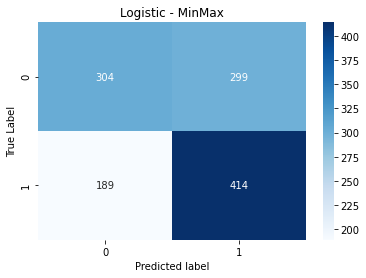

In [52]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_minmax_features)
model = sm.OLS(fire_minmax_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

plt.title('Logistic - MinMax')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 1-3. Standard

In [53]:
res = smf.ols(formula = 'fr_yn ~ ttl_grnd_flr + ttl_dwn_flr + bldng_ar_prc + fr_wthr_fclt_dstnc + cctv_in_100m + sft_emrgnc_bll_dstnc + ahsm_dstnc', data = fire_standard).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:39:28   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5000 

In [54]:
fire_standard_selected = fire_standard.iloc[:, [0, 5, 6, 9, 10, 14, 16, 17]]
fire_standard_selected

,fr_yn,ttl_grnd_flr,ttl_dwn_flr,bldng_ar_prc,fr_wthr_fclt_dstnc,cctv_in_100m,sft_emrgnc_bll_dstnc,ahsm_dstnc
0,0,-0.181851,-0.196625,-1.399407,-0.411257,-0.374976,-0.933643,-0.593832
1,0,-0.181851,-0.196625,0.934401,-0.544428,-0.374976,-1.012981,1.271633
2,0,-0.181851,-0.196625,0.150456,-0.564674,-0.374976,1.107595,0.649523
3,0,-0.181851,-0.196625,0.285665,-0.083726,-0.374976,-0.454762,-0.720553
4,0,-0.181851,-0.196625,-1.135526,0.593829,-0.374976,2.142310,-0.973477
...,...,...,...,...,...,...,...,...
6023,1,0.250422,0.916292,0.733039,-0.597067,1.078627,-1.058808,0.891382
6024,1,-0.181851,-0.196625,-0.874242,-0.516534,0.351826,-0.953702,1.046542
6025,1,-0.181851,-0.196625,-0.633739,-0.346021,-0.374976,-0.791937,0.252590
6026,1,-0.181851,-0.196625,-0.494133,-0.529581,-0.374976,-1.041525,-0.560985


In [55]:
fire_standard_features = fire_standard_selected.iloc[:, 1:]
fire_standard_labels = fire_standard_selected.iloc[:, 0]

In [56]:
train_x, test_x, train_y, test_y = train_test_split(fire_standard_features, fire_standard_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_standard_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


                            OLS Regression Results                            
Dep. Variable:                  fr_yn   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     88.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          3.76e-123
Time:                        18:39:40   Log-Likelihood:                -4079.9
No. Observations:                6028   AIC:                             8176.
Df Residuals:                    6020   BIC:                             8229.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5000 

Text(0.5, 15.0, 'Predicted label')

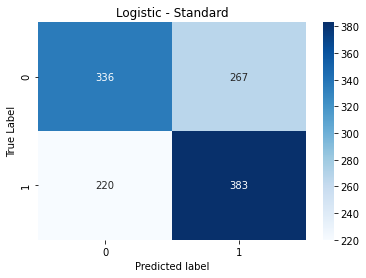

In [57]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
 
x2 = sm.add_constant(fire_standard_features)
model = sm.OLS(fire_standard_labels, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(test_x)
# print(y_pred)
# print(list(test_y))
 
print('정확도 :', metrics.accuracy_score(test_y, y_pred))

plt.title('Logistic - Standard')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

In [47]:
# fire_robust_selected.to_csv('fire_robust_selected_1to1.csv', encoding = 'cp949')
# fire_minmax_selected.to_csv('fire_minmax_selected_1to1.csv', encoding = 'cp949')
# fire_standard_selected.to_csv('fire_standard_selected_1to1.csv', encoding = 'cp949')

## 2. KNN

### 2-1. Robust

In [58]:
fire_features = fire_robust.iloc[:, 1:]
fire_labels = fire_robust.iloc[:, 0]

In [59]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


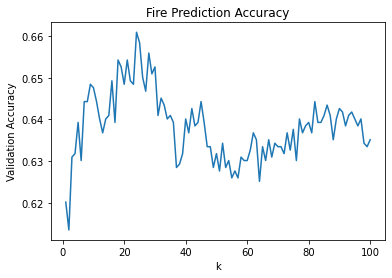

In [60]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [61]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

24
0.6608623548922057


Text(0.5, 15.0, 'Predicted label')

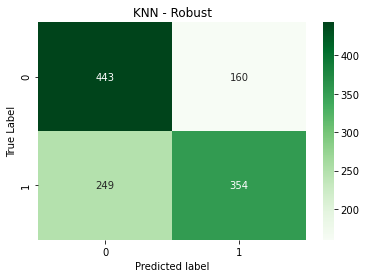

In [62]:
classifier = KNeighborsClassifier(n_neighbors = accuracies.index(max(accuracies)) + 1)
classifier.fit(train_x, train_y.values.ravel())

y_pred = classifier.predict(test_x)

plt.title('KNN - Robust')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Greens', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 2-2. MinMax

In [63]:
fire_features = fire_minmax.iloc[:, 1:]
fire_labels = fire_minmax.iloc[:, 0]

In [64]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


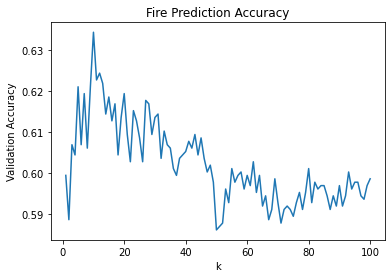

In [65]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [66]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

10
0.6343283582089553


Text(0.5, 15.0, 'Predicted label')

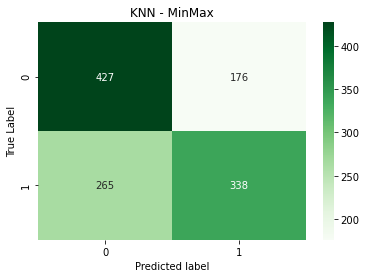

In [67]:
classifier = KNeighborsClassifier(n_neighbors = accuracies.index(max(accuracies)) + 1)
classifier.fit(train_x, train_y.values.ravel())

y_pred = classifier.predict(test_x)

plt.title('KNN - MinMax')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Greens', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 2-3. Standard

In [68]:
fire_features = fire_standard.iloc[:, 1:]
fire_labels = fire_standard.iloc[:, 0]

In [69]:
train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


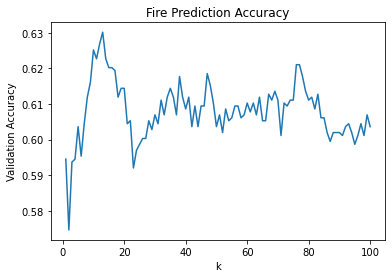

In [70]:
k_list = range(1,101)
accuracies = []

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_x, train_y.values.ravel())
    accuracies.append(classifier.score(test_x, test_y))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Fire Prediction Accuracy")
plt.show()

In [71]:
print(accuracies.index(max(accuracies)) + 1)
print(max(accuracies))

13
0.6301824212271974


Text(0.5, 15.0, 'Predicted label')

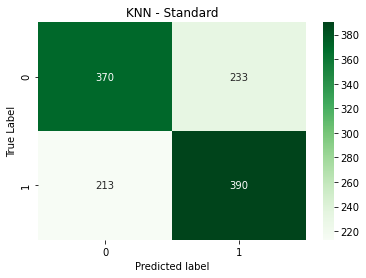

In [72]:
classifier = KNeighborsClassifier(n_neighbors = accuracies.index(max(accuracies)) + 1)
classifier.fit(train_x, train_y.values.ravel())

y_pred = classifier.predict(test_x)

plt.title('KNN - Standard')
cm = pd.DataFrame(confusion_matrix(test_y, y_pred))
sns.heatmap(cm, annot=True, cmap = 'Greens', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

## 3. Random Forest

### 3-1. Robust

In [73]:
fire_features = fire_robust.iloc[:, 1:]
fire_labels = fire_robust.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


In [74]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [07:41<00:00,  1.54s/it]

Best accuracy score: 0.684
Best number of trees : 234


Text(0.5, 15.0, 'Predicted label')

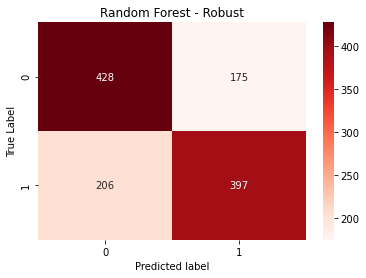

In [75]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

plt.title('Random Forest - Robust')
cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 3-2. MinMax

In [76]:
fire_features = fire_minmax.iloc[:, 1:]
fire_labels = fire_minmax.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


In [77]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [07:37<00:00,  1.53s/it]

Best accuracy score: 0.682
Best number of trees : 220


Text(0.5, 15.0, 'Predicted label')

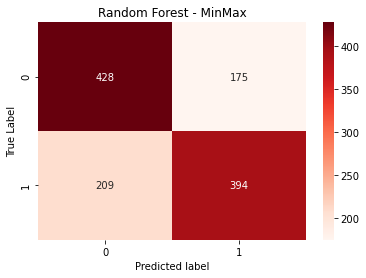

In [78]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

plt.title('Random Forest - MinMax')
cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')

### 3-3. Standard

In [79]:
fire_features = fire_standard.iloc[:, 1:]
fire_labels = fire_standard.iloc[:, 0]

train_x, test_x, train_y, test_y = train_test_split(fire_features, fire_labels, test_size = 0.2, 
                                                    random_state = 100, stratify = fire_labels)
print(len(train_x), len(test_x), len(train_y), len(test_y))

4822 1206 4822 1206


In [80]:
k = range(1, 301)
max_acc = 0
max_k = 0

for i in tqdm(k):
    rf = RandomForestClassifier(n_estimators = i, random_state = 100)
    rf.fit(train_x, train_y.values.ravel())

    predicted = rf.predict(test_x)
    accuracy = accuracy_score(test_y, predicted)
    
    if accuracy > max_acc:
        max_acc = accuracy
        max_k = i
        
print(f'Best accuracy score: {max_acc:.3}')
print(f'Best number of trees : {max_k}')

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [07:43<00:00,  1.54s/it]

Best accuracy score: 0.683
Best number of trees : 75


Text(0.5, 15.0, 'Predicted label')

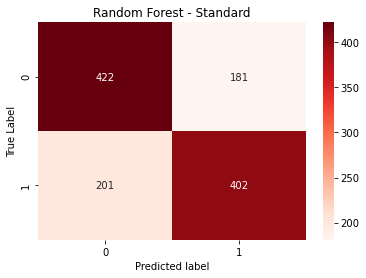

In [81]:
rf = RandomForestClassifier(n_estimators = max_k, random_state = 100)
rf.fit(train_x, train_y.values.ravel())

predicted = rf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

plt.title('Random Forest - Standard')
cm = pd.DataFrame(confusion_matrix(test_y, predicted))
sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd')
plt.ylabel('True Label')
plt.xlabel('Predicted label')